# Introduction to SUPERVISED LEARNING

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Advertising.csv'
advertising = pd.read_csv(url, usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [196]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [197]:
advertising[['TV','Sales']]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Proviamo a rappresentare i dati

Text(0.5, 1.0, 'Sales vs investment in TV advertising')

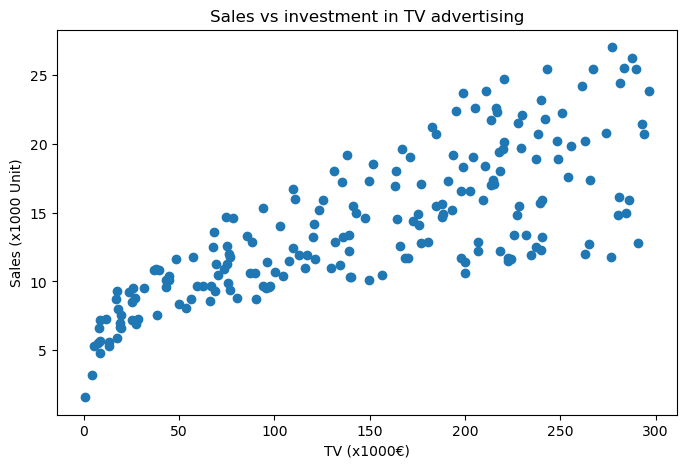

In [198]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')


Text(0.5, 1.0, 'Sales vs investment in Radio advertising')

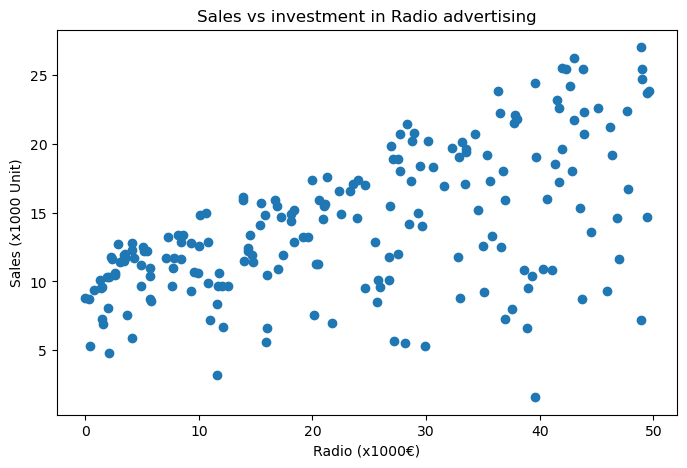

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Radio'].values, advertising['Sales'].values)
plt.xlabel("Radio (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Radio advertising')

Text(0.5, 1.0, 'Sales vs investment in Newspaper advertising')

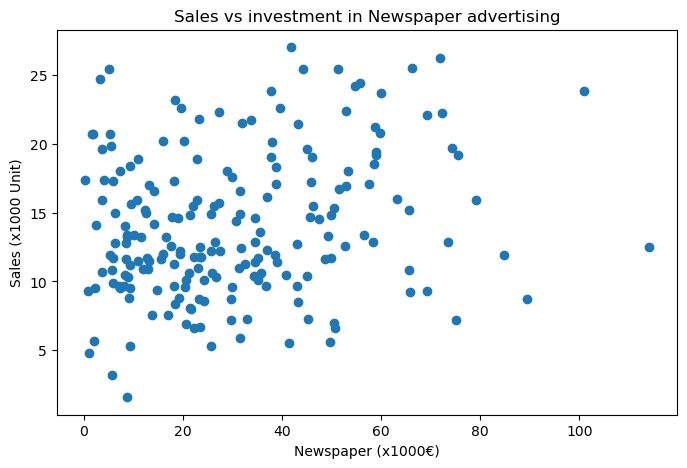

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Newspaper'].values, advertising['Sales'].values)
plt.xlabel("Newspaper (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Newspaper advertising')

Ricordiamo che Il nostro obiettivo è, dato un training set, per mezzo di un Learning Algorithm, individuare una funzione h: X → Y in modo che h (x) sia un “good” PREDICTOR.

Andiamo ad individuare il TRAINING SET

In [199]:
# creiamo il training set
# input features
x_train = advertising['TV'].values
x_train =x_train.reshape(-1,1)
# target
y_train = advertising['Sales'].values
y_train =y_train.reshape(-1,1)


Quante features abbiamo?

In [200]:
print(x_train.shape, y_train.shape)

(200, 1) (200, 1)


Ora dobbiamo effettuare il training sulla funzione

$h(x) = y = w_0 + w_1 x$

Il nostro modello è un modello di LINEAR REGRESSION con parametri $w_0, w_1$

Proviamo a plottare la nostra funzione sui dati che abbiamo a disposizione

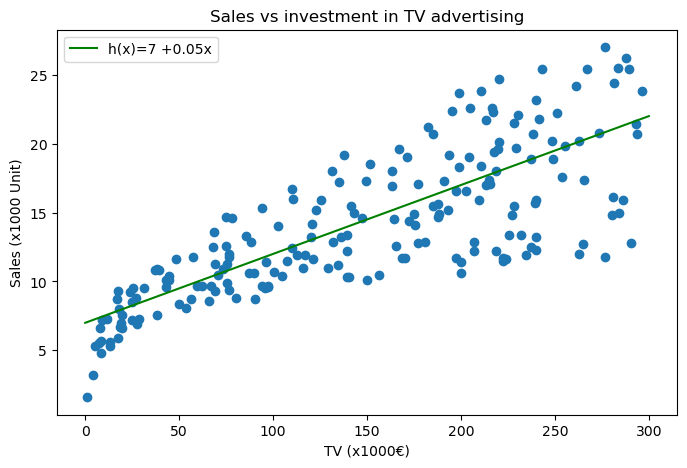

In [230]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')

def h(x, w0, w1):
    return w0+w1*x

# parametri
w0 = 7; w1 = 0.05
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-g', label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Come facciamo a scegliere i parametri $w_0, w_1$ ?

Usiamo l'algoritmo di training

## Importiamo la classe **LinearRegression** dal modulo **sklearn**

In [213]:
from sklearn.linear_model import LinearRegression



CREIAMO IL MODELLO
Utilizziamo la funzione LinearRegression ()


In [150]:
model = LinearRegression()

FACCIAMO IL TRAINING
Utilizziamo la funzione LinearRegression ()

In [264]:
model.fit(x_train, y_train)

LinearRegression()

Quali valori dei parametri w0 e w1 ha calcolato il nostro learning algorithm?

In [241]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

print('Il valore di w0 è: ',w0)
print('Il valore di w1 è: ',w1)


Il valore di w0 è:  7.032593549127693
Il valore di w1 è:  0.047536640433019764


Proviamo ora a plottare la nostra retta

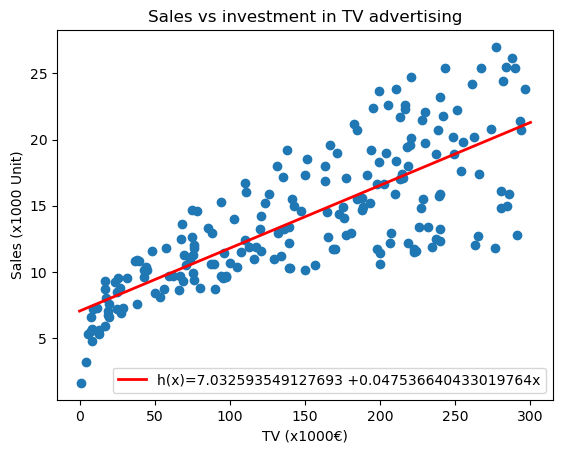

In [242]:
### plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Proviamo ora a fare qualche PREVISIONE

Quante vendite riesco a fare se investo 134000€ in TV advertising? E se investo 230000€ ?

In [261]:
xp = np.array([134,230]).reshape(-1,1)
yp = model.predict(xp)

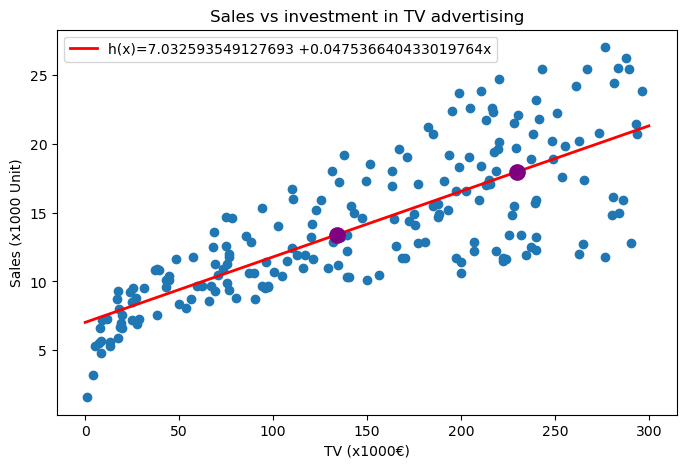

In [262]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')


plt.plot(xp,yp, 'o', color='purple', ms=11)

plt.legend()


# ORA PROVA TU. 
- Quante unità riesco a vendere con un investimento di 20000€ in radio? 
- Quante unità riesco a vendere con un investimento di 62000€ in newspaper? 

# INTRODUZIONE ALLA COST FUNCTION

La COST FUNCTION (denominata anche SQUARE ERROR FUNCTION) è la funzione definita come:

$J(w_0, w_1) = \frac{1}{2n} \sum \limits_{i=1}^{n} (h_{w_o,w_1}(x^i)-y^i)^2$

Importiamo tale funzione in Python

In [265]:
from sklearn.metrics import mean_squared_error

Proviamo a riprendere i nostri dati e facciamo una prediction su tutte le features

In [268]:
y_predict = model.predict(x_train)

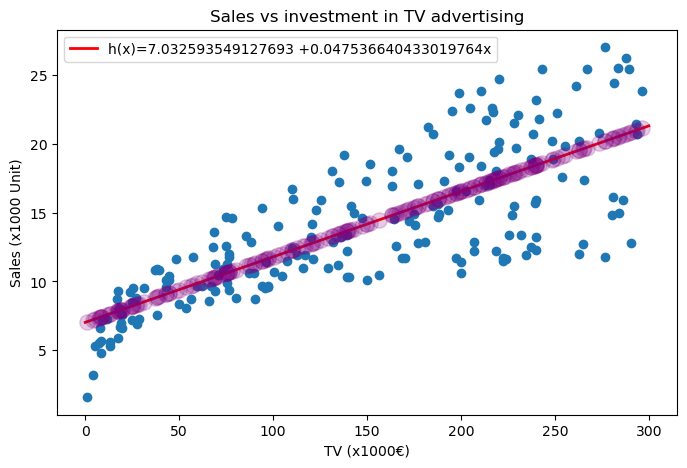

In [269]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')


plt.legend()
plt.plot(x_train, y_predict, 'o', color='purple', alpha=0.2, ms=11)

In [270]:
mean_squared_error(y_predict,y_train)

10.512652915656757

Proviamo capire un po' meglio cosa è la Cost Function

Costruiamo il vettore $h(x^i) - y^i$

Ricordiamo che $h(x^i)$ è y_predict, mentre $y^i$ è y_train

In [271]:
diff = y_predict - y_train

Proviamo a fare uno scatter plot di diff. Proviamo prima con un 

Text(0.5, 1.0, 'Plot of h(x)-y')

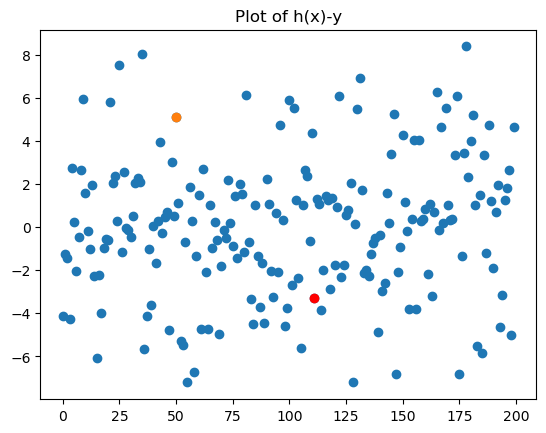

In [286]:
# plotto tutte le differenze
plt.plot(diff, 'o')
# metto in evidenza tre differenze
plt.plot(np.array([50]), diff[50], 'o')
plt.plot(np.array([111]), diff[111], 'o', color='red')
plt.plot()
plt.title('Plot of h(x)-y')

OSSERVAZIONI: 
- Notiamo che i valori sono distributi più o meno tra -8 e 8
- Il valore medio sembrerebbe 0

Proviamo a vederlo con un istogramma


(array([ 5.,  1.,  5.,  7.,  7.,  7.,  7.,  7., 15., 13., 15., 14., 19.,
        21., 13., 12.,  3.,  4.,  4.,  7.,  4.,  6.,  1.,  1.,  2.]),
 array([-7.21236867, -6.58843464, -5.96450062, -5.34056659, -4.71663257,
        -4.09269854, -3.46876452, -2.84483049, -2.22089647, -1.59696244,
        -0.97302842, -0.34909439,  0.27483963,  0.89877366,  1.52270768,
         2.14664171,  2.77057573,  3.39450976,  4.01844378,  4.64237781,
         5.26631183,  5.89024586,  6.51417988,  7.13811391,  7.76204793,
         8.38598196]),
 <BarContainer object of 25 artists>)

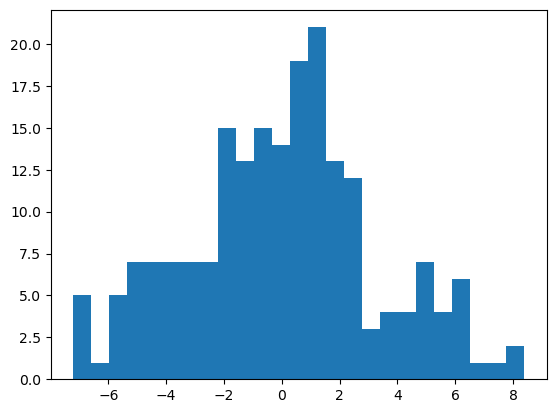

In [291]:
plt.hist(diff, bins=25)

Costruiamo il vettore $(h(x^i) - y^i))^2$

Ricordiamo che $h(x^i)$ è y_predict, mentre $y^i$ è y_train

In [298]:
squared = np.square(diff)

Text(0.5, 1.0, 'Plot of (h(x)-y)^2')

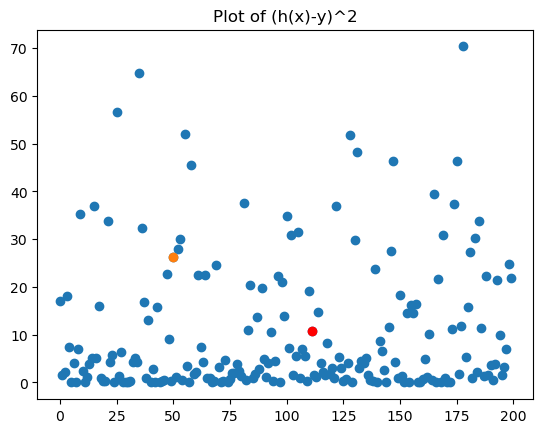

In [300]:
# plotto tutti quadrati delle differenze
plt.plot(squared, 'o')
# metto in evidenza tre differenze
plt.plot(np.array([50]), squared[50], 'o')
plt.plot(np.array([111]), squared[111], 'o', color='red')
plt.plot()
plt.title('Plot of (h(x)-y)^2')

OSSERVAZIONI: 
- Notiamo che i valori sono tutti positivi
- la Mean Square Error è più sensibile agli errori elevati rispetto ad altre metriche.  Ciò significa che, se il modello genera un errore molto grande per alcuni dati, la MSE aumenterà molto. Questa caratteristica può essere utile in alcuni contesti in cui gli errori elevati devono essere penalizzati maggiormente.


Calcolare la Cost Function significa fare la media dei quadrati delle differenze, per valori FISSATI di $w_0,w_1$

Proviamo a calcolare il MSE

In [308]:
squared.sum()/squared.shape[0]

10.512652915656757

Facciamo un confronto con la funzione utilizzata prima

In [303]:
mean_squared_error(y_predict,y_train)

10.512652915656757